In [9]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
 tf.__version__

'2.8.0'

In [6]:
!pip install tensorflow==2.4.1 --quiet

In [8]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

In [ ]:
( x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

In [18]:
class_names=['T-shirt/top',	'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
len(x_train)

60000

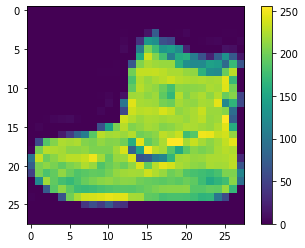

the label is: 9


In [14]:
utils.plot_image(x_train, y_train, cmap=None)

In [16]:
x_train = x_train / 255.0

x_test = x_test / 255.0

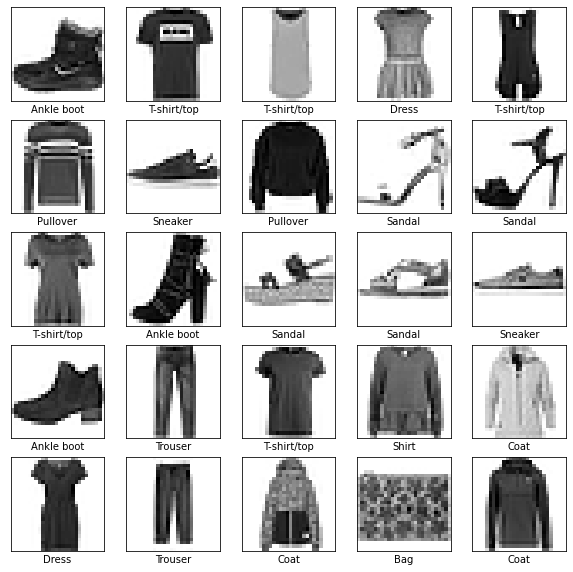

In [19]:
utils.plot_multi_images( x_train,y_train, class_names)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


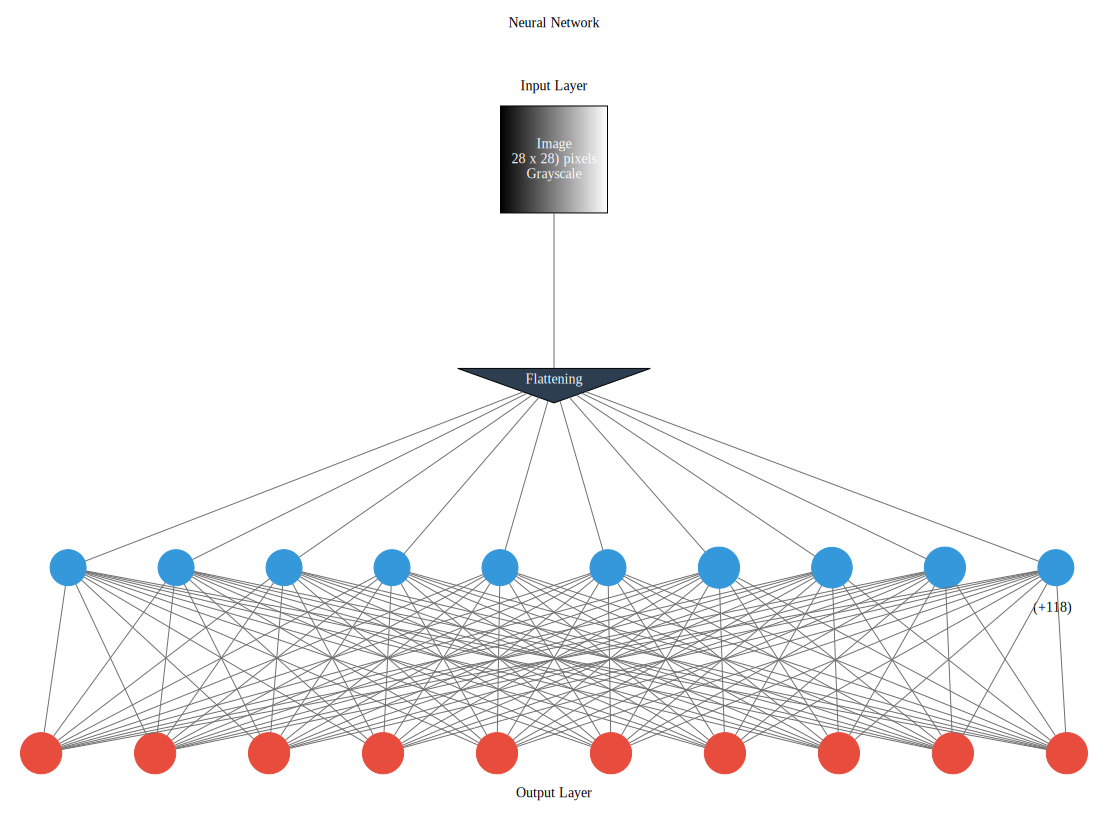

In [23]:
utils.draw_model(model)

In [29]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0901 - accuracy: 0.9670 - val_loss: 0.5022 - val_accuracy: 0.8906
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0888 - accuracy: 0.9660 - val_loss: 0.5089 - val_accuracy: 0.8855
Epoch 3/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0833 - accuracy: 0.9700 - val_loss: 0.5006 - val_accuracy: 0.8831
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 0.4995 - val_accuracy: 0.8892
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0789 - accuracy: 0.9709 - val_loss: 0.5111 - val_accuracy: 0.8879
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0818 - accuracy: 0.9696 - val_loss: 0.5338 - val_accuracy: 0.8863
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0815 - accuracy: 0.9696 - val_loss: 0.5583 - val_accuracy:

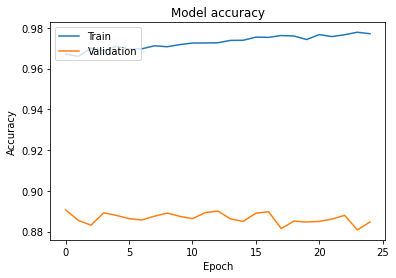

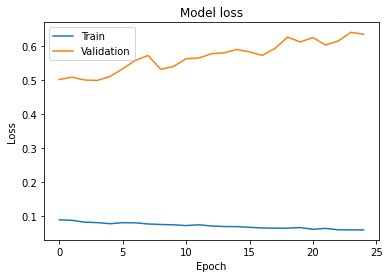

In [30]:
utils.plot_accuracy_and_loss(history)

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.8797


0.8797000050544739

In [32]:
test_loss

0.6896531581878662

In [36]:
pred = model.predict(x_test)

In [37]:
pred[0].argmax()

9

In [38]:
y_test[0]

9

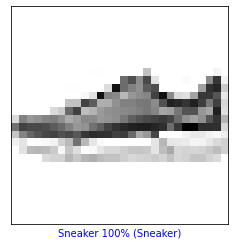

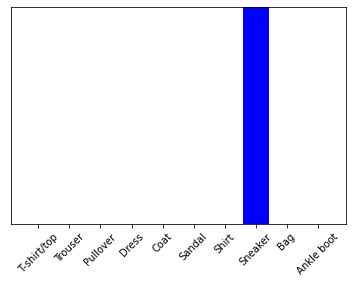

In [43]:
index = 9
utils.plot_image_and_prob(pred, y_test, x_test, i=index, big=True, class_names=class_names)

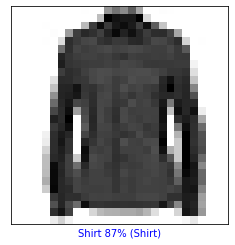

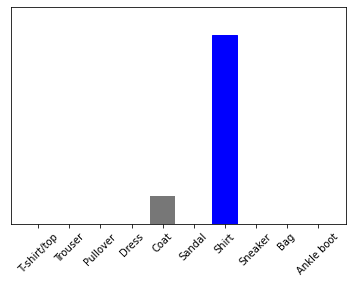

In [42]:
index = 26
utils.plot_image_and_prob(pred, y_test, x_test, i=index, big=True, class_names=class_names)

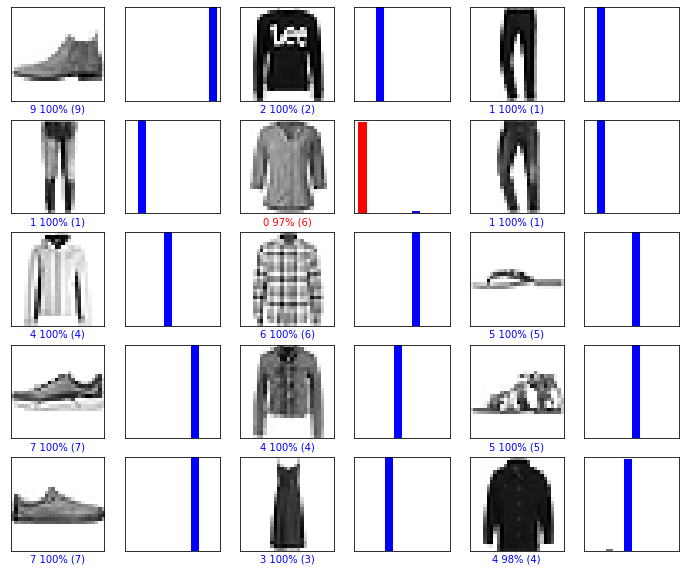

In [44]:
utils.plot_multi_images_prob(pred, y_test, x_test)

In [ ]:
#accuracy of the model is 0.867